# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Import DataFrames

In [2]:
orderlines_path = "/content/drive/MyDrive/Colab Notebooks/WBS - Bootcamp/Eniac Project/csv files/final_orderlines.csv"
orders_path = "/content/drive/MyDrive/Colab Notebooks/WBS - Bootcamp/Eniac Project/csv files/final_orders.csv"
products_path = "/content/drive/MyDrive/Colab Notebooks/WBS - Bootcamp/Eniac Project/csv files/final_products.csv"

orderlines = pd.read_csv(orderlines_path)
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path)

In [3]:
orderlines_df = orderlines.copy()
orders_df = orders.copy()
products_df = products.copy()

In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [5]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [6]:
# Convert date columns from object to datetime
orders_df["created_date"] = pd.to_datetime(orders_df['created_date'])
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'])

# The Time Periods

In [7]:
# Find the first and last order's date
first_order_date = orders_df['created_date'].min()
last_order_date = orders_df['created_date'].max()

print(f"Our first order placed in {first_order_date}")
print(f"Our last order placed in {last_order_date}")

# Calculate how many months we are selling products
orders_time_period = orders_df['created_date'].dt.to_period("M").nunique()
print(f"Our orders time period is {orders_time_period} months")

Our first order placed in 2017-01-01 01:51:47
Our last order placed in 2018-03-14 12:03:52
Our orders time period is 15 months


In [8]:
# Same steps are applied to orderlines to check the results are same
first_order_date = orderlines_df['date'].min()
last_order_date = orderlines_df['date'].max()

print(f"Our first order placed in {first_order_date}")
print(f"Our last order placed in {last_order_date}")

orders_time_period = orderlines_df['date'].dt.to_period("M").nunique()
print(f"Our orders time period is {orders_time_period} months")

Our first order placed in 2017-01-01 01:46:16
Our last order placed in 2018-03-14 11:58:13
Our orders time period is 15 months


# Revenue

In [9]:
# Helper function to convert summation to million
def sum_to_million(value):
  return (value.sum() / 1_000_000).round(2)

In [10]:
# Calculate total revenue
total_revenue = sum_to_million(orders_df['total_paid'])
print(f"Total revenue for {orders_time_period} months is {total_revenue} M")

Total revenue for 15 months is 7.98 M


In [11]:
# Calculate monthly revenue to see trends
monthly_revenue = orders_df.groupby(orders_df['created_date'].dt.to_period("M")).agg(**{"monthly_revenue (M)": ("total_paid", sum_to_million)})
monthly_revenue

,monthly_revenue (M)
created_date,
2017-01,0.62
2017-02,0.34
2017-03,0.02
2017-04,0.23
2017-05,0.33
2017-06,0.29
2017-07,0.61
2017-08,0.39
2017-09,0.40


<Axes: xlabel='created_date'>

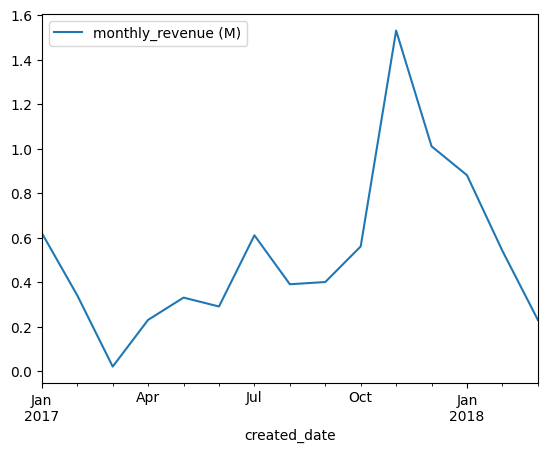

In [12]:
# Plot to get better insight
monthly_revenue.plot()

# Seasonal Pattern

In [13]:
# Group the data by quarters (seasons) to get seasonal total revenue
seasonal_revenue = orders_df.groupby(orders_df["created_date"].dt.to_period("Q")).agg(**{"seasonal revenue (M)": ("total_paid", sum_to_million)})
seasonal_revenue

,seasonal revenue (M)
created_date,
2017Q1,0.99
2017Q2,0.86
2017Q3,1.39
2017Q4,3.09
2018Q1,1.65


<Axes: xlabel='created_date'>

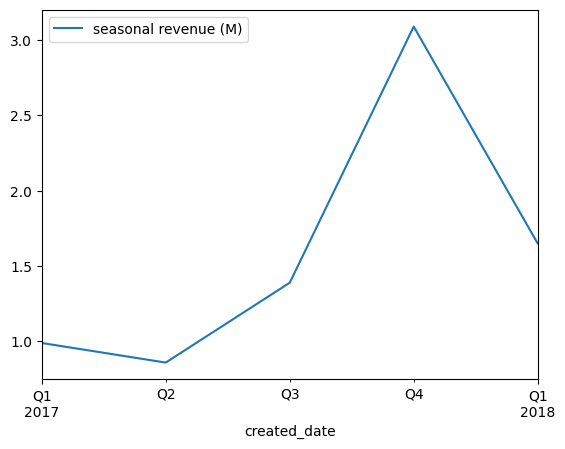

In [14]:
# Plot results to get better insight
seasonal_revenue.plot()

# Investigate Products

In [15]:
# Helper function to sum and convert to thousand
def sum_to_K(value):
  return (value.sum() / 1_000).round(2)

orderlines_df["unit_price_total"] = orderlines_df['product_quantity'] * orderlines_df["unit_price"]

# group orderlines by sku number and aggregate to calculate total price and total quantity
total_sell_and_quantity_df = orderlines_df.groupby("sku").agg(**{
                                                                 "Total Sell (K)":("unit_price_total", sum_to_K),
                                                                 "How Many Sold": ("product_quantity", "sum")
                                                                 }
                                                              )

# Merge with products_df to get name of the product
total_sell_and_quantity_df = total_sell_and_quantity_df.merge(products_df.loc[:, ["sku", "name"]],
                                                              on="sku",
                                                              how="inner")

# Sort columns according to my desire
total_sell_and_quantity_df = total_sell_and_quantity_df[["sku", "name", "How Many Sold", "Total Sell (K)"]]

# Display result dataframe
total_sell_and_quantity_df

,sku,name,How Many Sold,Total Sell (K)
0,8MO0001-A,Open - Micro SD Adapter 8Mobility iSlice Macbo...,1,0.01
1,8MO0003-A,Open - 8Mobility iSlice Micro SD adapter for M...,1,0.01
2,8MO0007,8Mobility iSlice Micro SD adapter for Macbook ...,7,0.16
3,8MO0008,8Mobility iSlice Micro SD Adapter Macbook Pro ...,11,0.24
4,8MO0009,8Mobility iSlice Micro SD Adapter for Macbook ...,5,0.09
...,...,...,...,...
5084,ZAG0040,Zagg Glass Screen Protector + Contour Contour ...,1,0.03
5085,ZAG0041,Zagg iPhone Glass Screen Protector + 8 Plus / ...,1,0.02
5086,ZAG0042,Zagg Glass Screen Protector + iPhone 8/7 / 6 / 6S,1,0.02
5087,ZEP0007,Zepp Golf Golf Amarillo Sensor Kit,1,0.13


In [16]:
# Sort data by Total Sell (K) to find the products which brings more money
total_sell_and_quantity_df.sort_values("Total Sell (K)", ascending=False)[:10]

,sku,name,How Many Sold,Total Sell (K)
2363,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",239,135.38
758,APP2446,Apple iPhone 6 32GB Space Gray,270,104.56
648,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,537,86.47
775,APP2477,Apple iPhone 64GB Space Gray 8,108,85.30
658,APP1970,Apple iPhone 32GB Space Gray,223,80.72
700,APP2072,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",77,74.96
784,APP2485,Apple iPhone 8 Plus 64GB Gold,79,70.72
4897,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",476,65.59
782,APP2483,Apple iPhone 8 Plus 64GB Space Gray,67,60.09
777,APP2479,Apple iPhone 64GB Gold 8,67,52.98


In [17]:
# Sort data by How Many Sold to figure out which products are sold mostly
total_sell_and_quantity_df.sort_values("How Many Sold", ascending=False)[:10]

,sku,name,How Many Sold,Total Sell (K)
444,APP1190,IPhone AppleCare Protection Plan,955,51.95
360,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,820,8.18
648,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,537,86.47
378,APP0927,EarPods Apple Headphones with Remote and Mic (...,489,8.35
4897,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",476,65.59
3913,SAM0074,Samsung 850 EVO SSD Disk 500GB,329,50.18
1219,CRU0051,Crucial MX300 525GB SSD Disk,328,44.36
758,APP2446,Apple iPhone 6 32GB Space Gray,270,104.56
2895,NTE0013,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",252,4.92
1218,CRU0050,Crucial MX300 275GB SSD Disk,248,21.11


# Check Discounts

In [18]:
filtered_products_df = products[["sku", "name", "price"]]
filtered_orderlines_df = orderlines_df[["id", "id_order", "product_quantity", "sku", "unit_price", "date"]]

discounts_df = filtered_orderlines_df.merge(filtered_products_df, on="sku", how="inner")
discounts_df["discount"] = (discounts_df["price"] - discounts_df["unit_price"]).round(1)
discounts_df["discount_percentage"] = (discounts_df["discount"] * 100 / discounts_df["price"]).round(2)

In [19]:
discounts_df.sample(10)

,id,id_order,product_quantity,sku,unit_price,date,name,price,discount,discount_percentage
40412,1516864,472366,1,OWC0035-2,76.99,2017-12-26 17:56:12,Mac memory OWC 8GB (2x4GB) SO-DIMM DDR3 1066MHZ,87.98,11.0,12.50
35951,1471156,453169,2,NTE0103,94.99,2017-12-01 12:21:13,NewerTech NuPower 55 W Battery for MacBook Air...,119.99,25.0,20.84
30898,1428393,434888,1,AP20272,26.99,2017-11-23 15:21:24,Like new - Apple Leather Case iPhone Case Midn...,45.00,18.0,40.00
48756,1604182,507528,1,GRT0374,32.99,2018-02-07 16:17:14,Griffin Elevator Mac and PC support Silver / T...,39.95,7.0,17.52
43568,1544841,484750,1,APP2485,889.00,2018-01-07 23:36:03,Apple iPhone 8 Plus 64GB Gold,919.00,30.0,3.26
48404,1601196,506245,1,ELA0039,9.99,2018-02-05 13:57:39,elago Airpods Silicone Case White Case,14.99,5.0,33.36
6561,1172223,320386,1,TPL0017,63.99,2017-02-06 10:54:50,TP-Link RE450 coverage Extender - repeater Wi-...,79.90,15.9,19.90
37486,1493464,461677,1,MOS0082,19.99,2017-12-13 11:06:26,Moshi iGlaze XT iPhone Case SE / 5s / 5 transp...,30.00,10.0,33.33
35249,1460543,449331,1,APP1118,458.92,2017-11-27 20:13:59,Apple iPad Wi-Fi Mini 4 128GB Space Gray,482.81,23.9,4.95
47511,1591189,502480,1,ZAG0036,19.99,2018-01-31 03:14:30,Wireless Headset iFrogz zagg Coda microphone,29.99,10.0,33.34


In [20]:
(discounts_df["discount"] > 0).value_counts()

,count
discount,
True,49324
False,3896


In [21]:
no_discounts_df = discounts_df.loc[discounts_df['discount'] == 0]
discounts_df = discounts_df.loc[discounts_df['discount'] > 0]

In [22]:
print(no_discounts_df.shape)
print(discounts_df.shape)

(2983, 10)
(49324, 10)


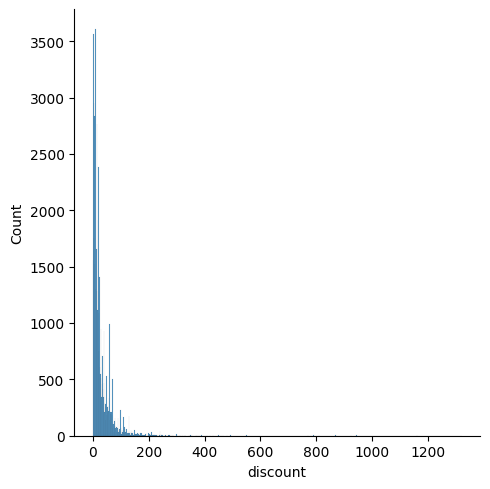

In [23]:
sns.displot(data=discounts_df, x="discount")

## Product by Product Discounts

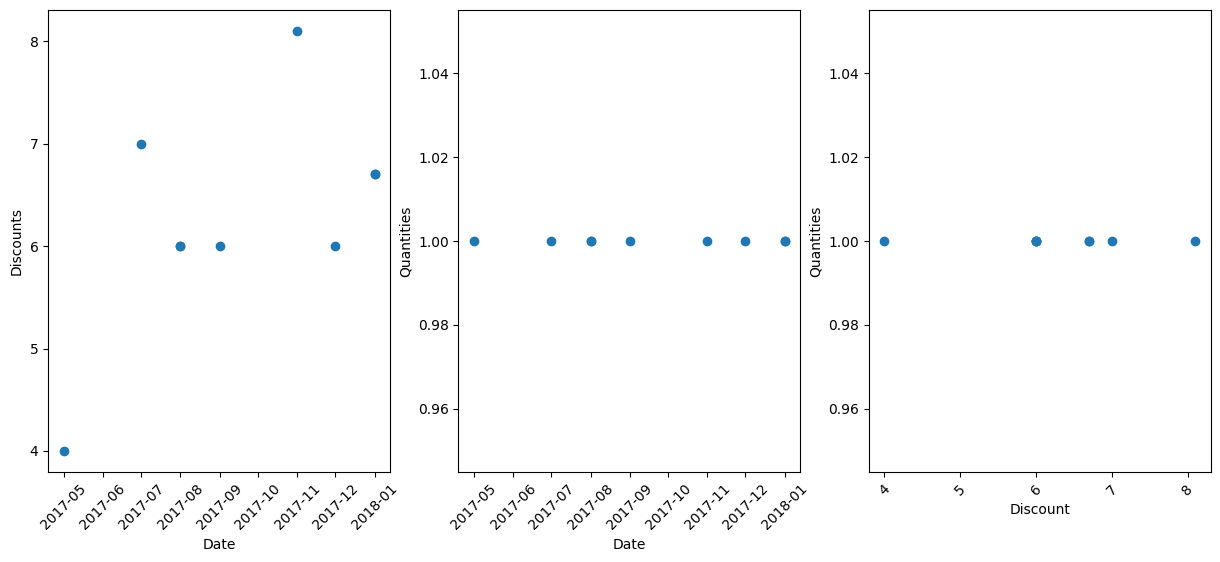

In [24]:
selected_sku = random.choice(discounts_df['sku'])
selected_discounts_df = discounts_df[discounts_df['sku'] == selected_sku]

date = selected_discounts_df['date'].dt.to_period("M").dt.to_timestamp()
discounts = selected_discounts_df['discount']
quantities = selected_discounts_df["product_quantity"]

figure, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].scatter(date, discounts)
axes[0].set_ylabel("Discounts")
axes[0].set_xlabel("Date")

axes[1].scatter(date, quantities)
axes[1].set_ylabel("Quantities")
axes[1].set_xlabel("Date")

axes[2].scatter(discounts, quantities)
axes[2].set_ylabel("Quantities")
axes[2].set_xlabel("Discount")

for ax in axes:
  ax.tick_params(axis="x", rotation=45)

plt.show()

## xxx

In [25]:
lower_bounds = range(0, 100, 5)
upper_bounds = range(5, 105, 5)
def range_discounts(discount):
  for lower, upper in zip(lower_bounds, upper_bounds):
    if discount == 0:
      return "No discount"
    elif lower < discount < upper:
      return f"{lower}-{upper}"

discounts_df["discount_level"] = discounts_df["discount_percentage"].apply(range_discounts)

In [26]:
discounts_df.sample(10)

,id,id_order,product_quantity,sku,unit_price,date,name,price,discount,discount_percentage,discount_level
6172,1169312,318852,1,SAM0074,164.99,2017-02-01 20:52:03,Samsung 850 EVO SSD Disk 500GB,179.99,15.0,8.33,5-10
41794,1527969,477655,1,NES0012,209.00,2017-12-30 21:23:29,Nest Learning Thermostat Intelligent,249.00,40.0,16.06,15-20
179,1120673,300309,1,OTT0136,19.99,2017-01-02 09:54:16,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,34.99,15.0,42.87,40-45
22201,1350926,399277,1,AP20310,400.33,2017-09-12 17:45:05,Like new - Apple iPhone SE 128GB Space Gray,529.00,128.7,24.33,20-25
12756,1258256,360640,1,TOS0018,52.99,2017-05-30 16:03:52,Toshiba Canvio Basic Hard Disk 1TB USB 3.0 25 ...,58.99,6.0,10.17,10-15
42053,1530049,478541,1,CRU0050,77.90,2018-01-01 15:26:00,Crucial MX300 275GB SSD Disk,98.39,20.5,20.84,20-25
50460,1620698,514584,1,BEL0300,34.99,2018-02-19 23:14:24,Belkin Rockstar Lightning Audio Adapter + Char...,39.99,5.0,12.50,10-15
50713,1622705,515489,1,GTE0140,58.95,2018-02-21 15:13:59,G-Technology G-DRIVE mobile USB 3.0 1TB,74.99,16.0,21.34,20-25
48863,1605651,508061,1,HOC0016,69.99,2018-02-08 11:43:03,Hoco Milanese Apple Watch Edition 42mm Black Belt,89.00,19.0,21.35,20-25
14359,1277108,370053,1,PAC0622,217.99,2017-06-28 18:45:01,Samsung SSD 850 expansion kit EVO 500GB + Data...,287.98,70.0,24.31,20-25


Text(0, 0.5, 'Percentage of Total Sold Product')

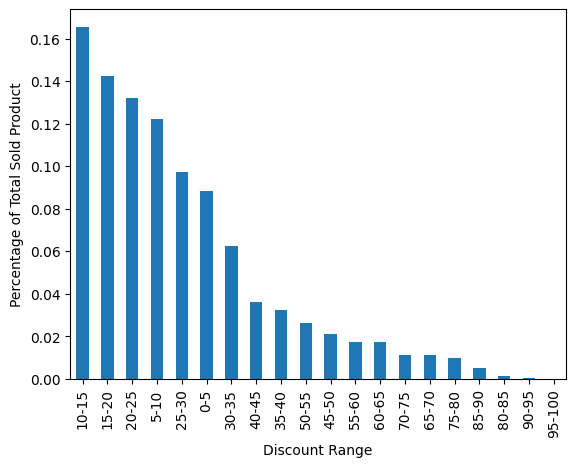

In [27]:
discounts_df["discount_level"].value_counts(normalize=True).plot.bar()
plt.xlabel("Discount Range")
plt.ylabel("Percentage of Total Sold Product")

# My Some Works

In [28]:
# Take just required columns from orders_df
filtered_orders_df = orders_df.loc[:, ["order_id", "created_date", "total_paid", "state"]]
# Calculate total unit_price by grouping id_order
total_price_by_order_id = orderlines_df.groupby("id_order").agg(total_price=("unit_price_total", "sum"))

# Merge two dataframe and calculate difference between total_paid and total_price
difference_df = filtered_orders_df.merge(total_price_by_order_id, left_on="order_id", right_on="id_order", how="inner")
difference_df["difference"] = (difference_df["total_paid"] - difference_df["total_price"]).round(1)

In [29]:
# Calculate discount and discount percentage
# Note: There is discount if total_price is bigger than total_paid which means negative difference
difference_df["discount"] = difference_df["difference"].apply(lambda diff: -diff if diff < 0 else 0)
difference_df["discount %"] = (difference_df["discount"] * 100 / difference_df["total_price"]).round(1)

In [30]:
difference_df["discount"].value_counts()

,count
discount,
0.0,40763
5.0,114
1.0,108


In [31]:
print(f"Discount %\n\tMin: {difference_df['discount %'].min()}\n\tMax: {difference_df['discount %'].max()}")

Discount %
	Min: 0.0
	Max: 9.9


In [32]:
difference_df["charges"] = difference_df["difference"].apply(lambda diff: diff if diff > 0 else 0)
difference_df["charges %"] = (difference_df["charges"] * 100 / difference_df["total_price"]).round(1)

<Axes: >

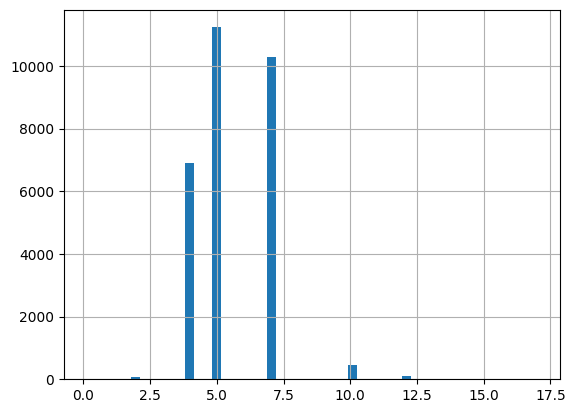

In [33]:
difference_df.loc[difference_df["charges"]>0, "charges"].hist(bins=50)

In [34]:
print(f"Charges %\n\tMin: {difference_df['charges %'].min()}\n\tMax: {difference_df['charges %'].max()}")

Charges %
	Min: 0.0
	Max: 425.0


<Axes: >

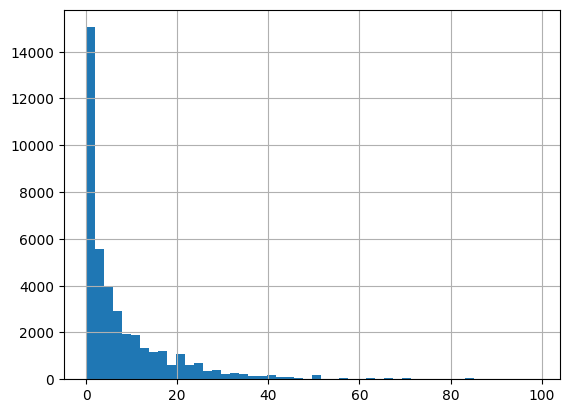

In [35]:
difference_df.loc[difference_df["charges %"].between(0, 100), "charges %"].hist(bins=50)